### Importing of some basic library needed for this project 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import linear_model

### Importing of the dataset needed for this project 

In [2]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### cheching of the shape of the dataset i.e the total numbers of rows and total numbers of columns in the given dataset

In [3]:
df.shape

(500, 9)

### checking of the missing value in the given dataset

In [4]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### cleaning of the given dataset 

In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df.drop("Serial No.", axis=1, inplace=True)

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### The column that has the Serial No. has less important in the  dataset  that is the reason of dropping its column  from the table

# EXPLORATORY DATA ANALYSIS

In [8]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


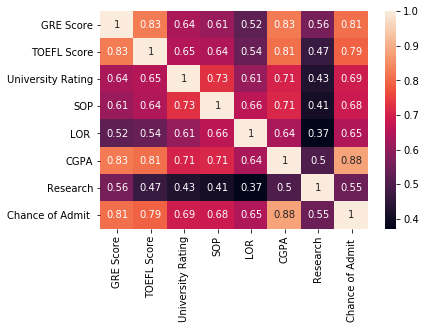

In [10]:
sns.heatmap(df.corr(), annot=True)
plt.show()

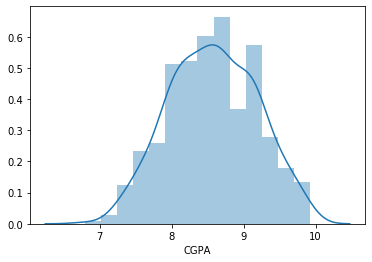

In [11]:
sns.distplot(df.CGPA)
plt.show()

In [12]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

### showing the Linear Regression with GRE Score, TOEFL Score, CGPA, all in comparison of Chance of Admission in the seaborn visualization below

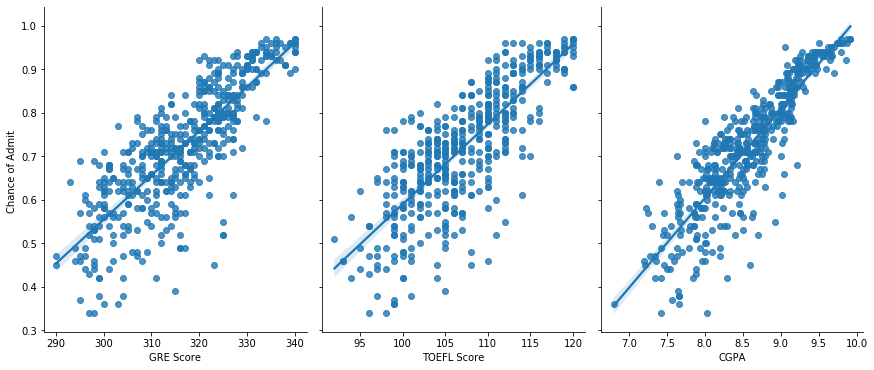

In [13]:
sns.pairplot(df, x_vars=['GRE Score', 'TOEFL Score', 'CGPA',], y_vars='Chance of Admit ', height=5, aspect=0.8, kind="reg")
plt.show()

## From the graph above the insight drawn from the graph above are listed below : 
### (1) The greater the Gre Score  the higher the chance of admission
### (2) The greater the TOEFL Score the higher the chance of admission
### (3) The greater the CGPA the higher the chance of admission

In [14]:
x = df.drop(['University Rating', 'SOP', 'LOR ','Research', 'Chance of Admit '], axis = "columns")         

### GRE Score, TOEFL Score, CGPA are preferrably used for our x because those columns has the highest correlated values and are dependent variables

In [15]:
x.head()

,GRE Score,TOEFL Score,CGPA
0,337,118,9.65
1,324,107,8.87
2,316,104,8.00
3,322,110,8.67
4,314,103,8.21


In [16]:
y = df.drop(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research'], axis="columns")

## Chance of Admit(i.e Chance of admission) in the given dataset is our indepent variable and is what we are trying to predict which is our output

In [17]:
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


# Building of machine learning model of Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random

In [19]:
LnR = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.20)

In [20]:
LnR.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print("x_train shape: ", x_train.shape, " x_test shape: ", x_test.shape, " y_train shape: ", y_train.shape, " y_test shape: ", y_test.shape)

x_train shape:  (400, 3)  x_test shape:  (100, 3)  y_train shape:  (400, 1)  y_test shape:  (100, 1)


## Evaluation of the model 

In [22]:
y_pred = LnR.predict(x_test)

In [23]:
y_pred[1:7]

array([[0.83209435],
       [0.79119818],
       [0.85046086],
       [0.60222891],
       [0.66888863],
       [0.55297329]])

In [24]:
# predicted value and the real value
y_test.head()

,Chance of Admit
90,0.64
254,0.85
283,0.80
445,0.91
461,0.68


## To calculate the error in the model build for the given dataset

In [25]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

0.04688621359385712


### The error is okay for the model